( Still in progress ) Last edit : 02/03/2023
The Aim of this notebook is to give a high level overview of Git as a version control system and then an understanding of how Git works under the hood.

Sources / Additional Reading : 
- Git Docs : https://git-scm.com/docs
- Wikipedia : https://en.wikipedia.org/wiki/Git
- Microsoft Docs : https://learn.microsoft.com/en-us/azure/devops/repos/tfvc/comparison-git-tfvc?view=azure-devops
- Paolo Perrotta - Pluralsight Instructor
- Git in 15 minutes : https://www.youtube.com/watch?v=USjZcfj8yxE
- Git in 2 minutes : https://www.youtube.com/watch?v=2ReR1YJrNOM

Version control systems

- A version control system (VCS) is a software tool that helps manage changes to software code, documents, and other files over time. It allows developers to keep track of changes made to a file, see who made those changes, and revert back to earlier versions if necessary. 
- There are mainly two kinds of version control systems. Distributed and Centralized ( Client / Server ).
- Git utilises a distributed version control system, a contrast to the older Team Foundation Version Control (TFVC) which utilises a Client/Server version control system.

Git vs TFVC : 


TFVC utilises a client/server version control system:
- a central server stores all of the source code. 
- To retrieve the source code from the server the developer downloads a copy of their files to their system.
- to perform any editing a developer 'checks out' files and to update the source code on the central server a developer 'checks in' their changes.
- The single server acts as the "source of truth" for all changes and history for the code. 
- If the central server goes down, the workflow for all developers is broken as there is no where to push/retrieve any changes to source code.

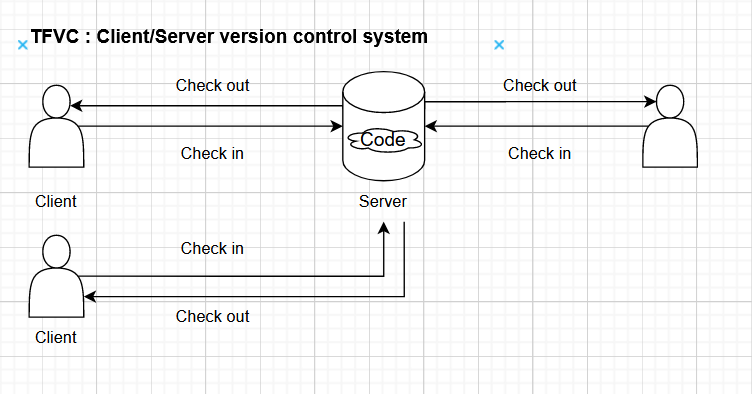

Git on the other hand utilises a distributed version control system:
- In this system there is no central server that clients push to, instead a single remote repository is "agreed to" by all clients and it acts as the source of truth for changes and history for the code.
- The chosen remote repository is no different to a local repository on a client, other than it may have further capabilities to be able to efficiently host source code and serve clients. 
- Clients can also commit to their local repository rather than to their remote repository. This is different to client/server as it means even if the remote repository goes down, clients are still able to commit all of their changes to a local repository and have a history of when changed were made. 
- The remote repository is able to be swapped out.

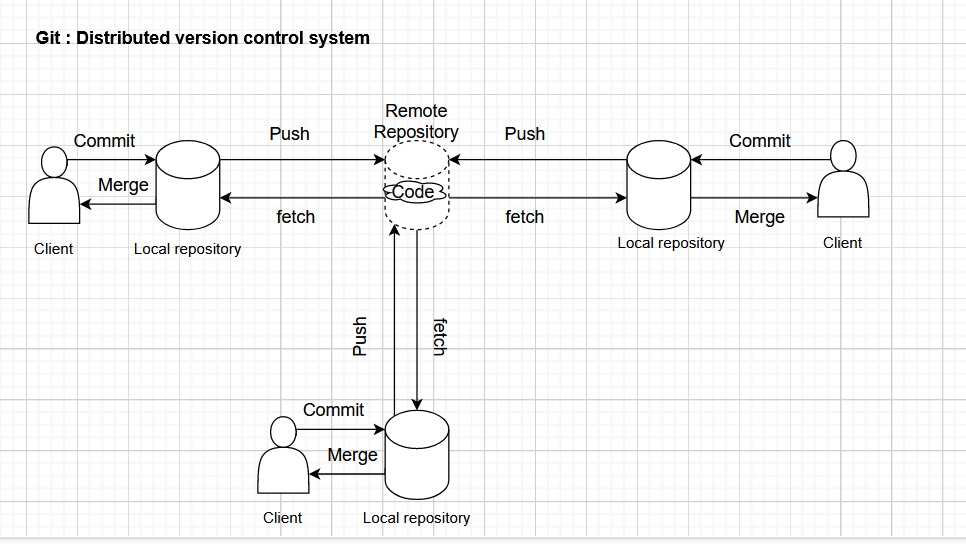

Git to TFVC commands cheatsheet : https://docs.google.com/spreadsheets/d/1QBJkMfX8MOlQfHmqaOyw342TN_bt7qUfgkko9LNPgOw/edit?usp=sharing ( some commands are similar NOT the same )

Areas of Git : 
- Working directory ( Working Tree ) : Where we modify files.
- Staging area: A temporary area where changed / added files are kept to be added to the next commit.
- Local repository: Contains the code that has been committed or fetched from the remote repository.
- Remote repository: The remote server that stores the code.

How Git Commands work : 

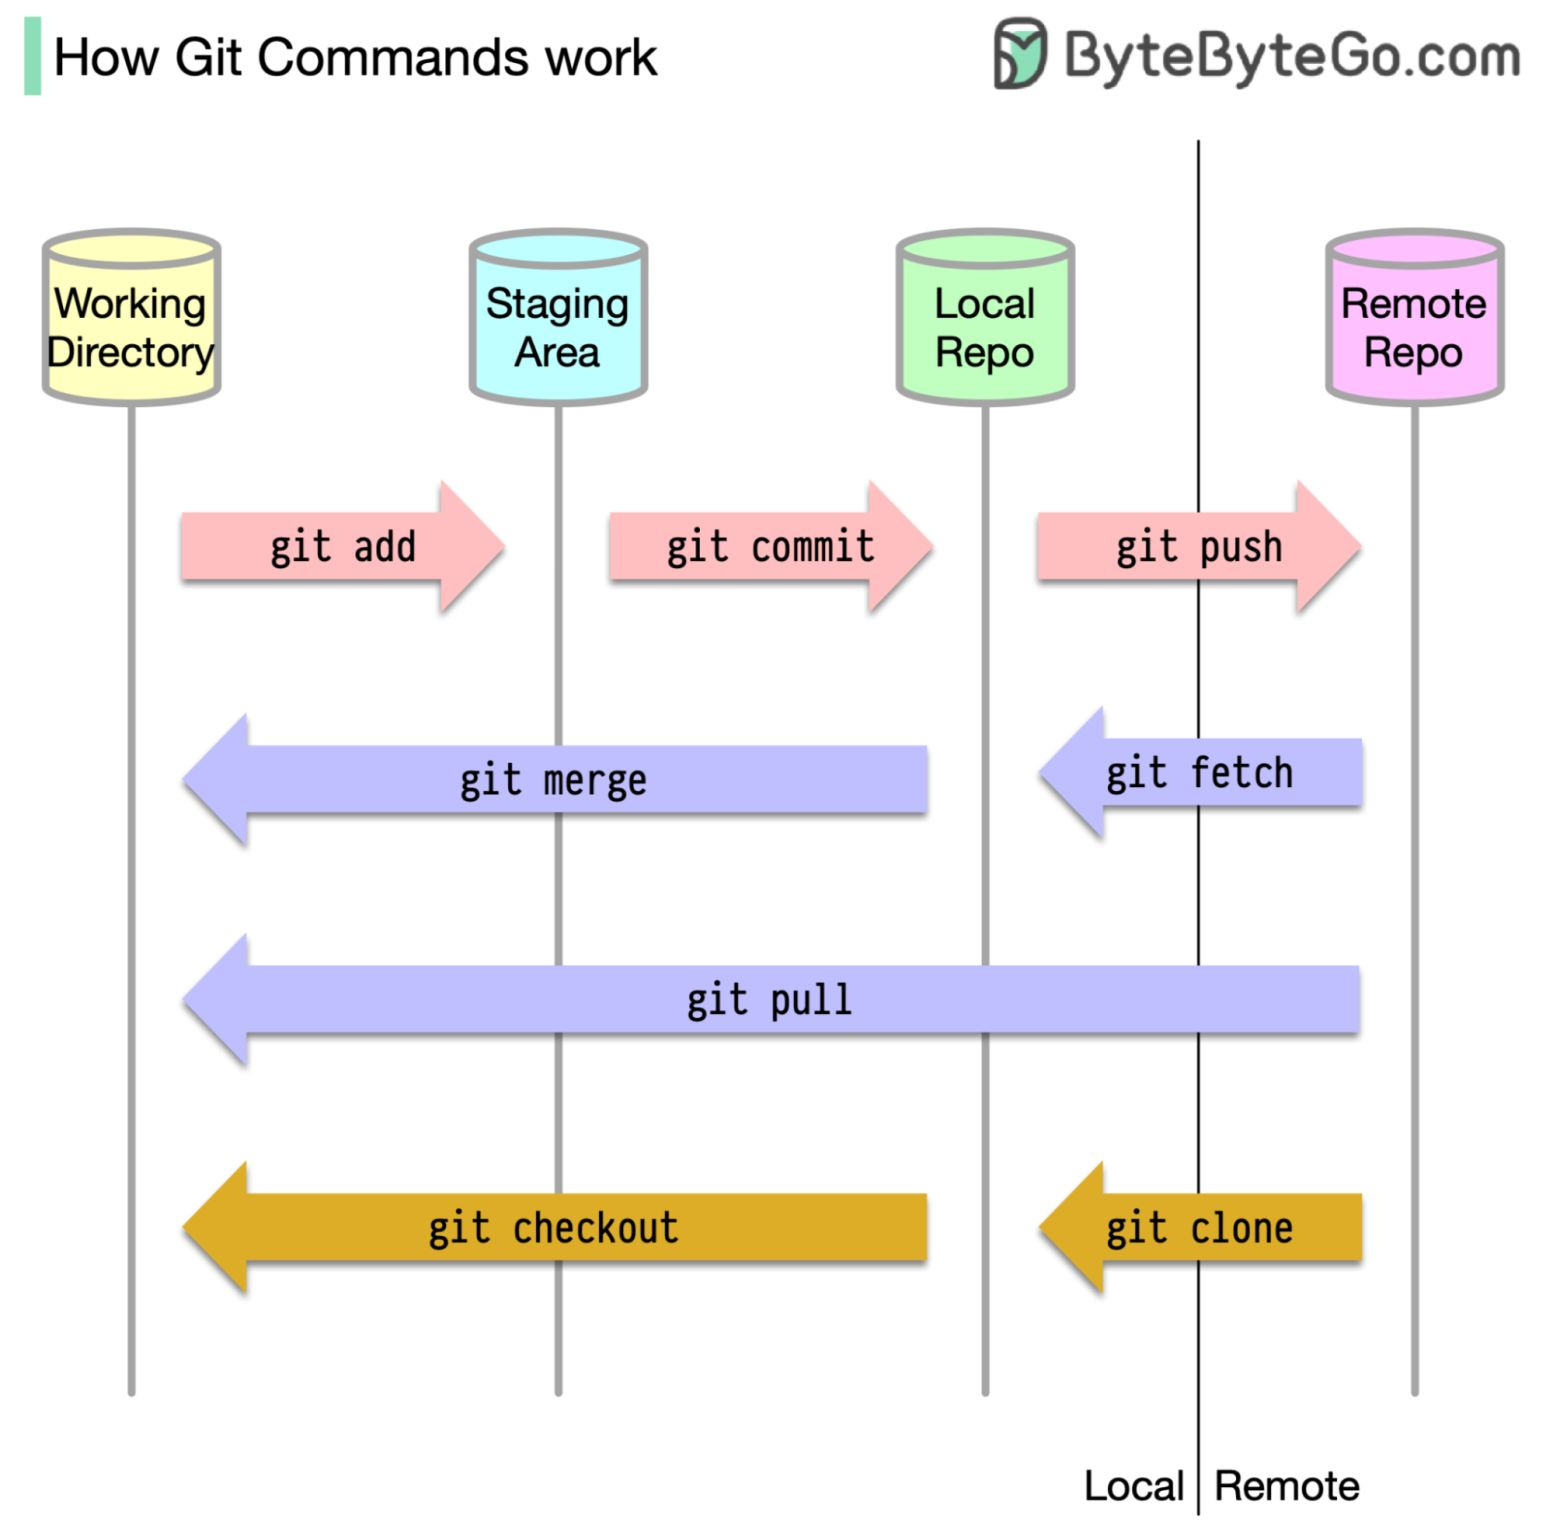

What is Git exactly? 

We generally know Git through the usage of basic porcelain commands and as a tool that tracks changes to your files. But what is Git really? Well, Git at it's core, is a peristent map. A table of sorts, with keys and values. 

- Values: Sequence of bytes ( i.e the content of a file ) 
- Keys : A SHA1 hash calculated based on the sequence of bytes ( value ) given.


Types of Git objects: 

Git fundamentally stores four types of objects, these objects can all be found in the objects folder of the .git repository :

- Blob : A blob is a generic piece of content such as text stored in a file. This content has been hashed, compressed and persisted by git. Note, hashing for the blob does not take into account the name of the file or its path in the file system, only the content. The name of the file, the path and its permissions are hashed and stored in the tree object that points to the blob.
- Tree : A tree is a directory stored in git. A tree can be the parent of many blobs and also of other trees. A tree just stores the metadata of its children, such as whether it’s a blob or tree, it’s hash and the name of the file/folder. 
- Commit : A commit is a snapshot of the tracked file system at a point in time.  it stores metadata about the hash of the committed tree, the author and the committer, every commit has a parent commit with the exception of the very first one. The tree the commit holds information for is usually the root folder of the project. 
- Tag : A label you attach to a commit that has some metadata about that commit such as release number or release name.

You may ask, what happens if we have two files that have the exact same SHA1 hash? ( I.e they have the same content )
- Git will just reuse that hash. It will not create a new blob object. Remember the hash for a blob just represents some content, not the file itself. Thus, there is no need to create and store the same blob twice. For example, let’s say you have two files that both have abc123 as their content. Let’s say those two files are under different directories and each directory is represented as a tree object. Indeed, both tree objects will point to the same blob, which represents the content of both files. 

- As shown in the below example two trees point to the same blob, this means at least one file exists in each tree, that has the text content abc123.

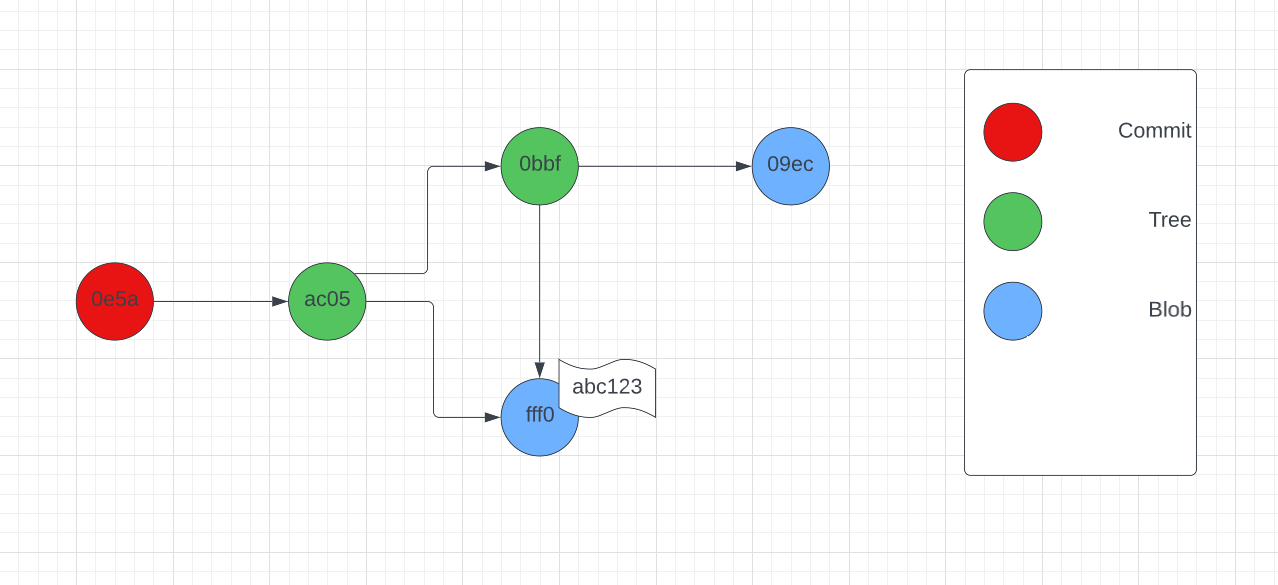

If blobs only store the file content, where is the rest of the file metadata saved?
- As mentioned earlier, that is stored in the tree object, rather than the blob. This makes sense as if file specific metadata was stored in the blob it would not be possible to reuse it.

Git is very efficient: 
- At first you may think git stores a blob of all the content every time a file is changed, this is not the case. In reality blobs would only store the differences between the changed file and these changes are further compressed to optimise space.  Also, for every new commit, if a file or directory hasn’t changed, git will reuse the tree / blob associated with it. Meaning that objects of the new commit will continue to point to the same blob instead of creating new duplicate blobs or trees. Thus, new blobs/tree are only created when the content of files / folders HAVE changed.

- As shown in the below example, two trees, across different commits, both point to the same blob, this means the content associated with this blob has not changed since the last commit.
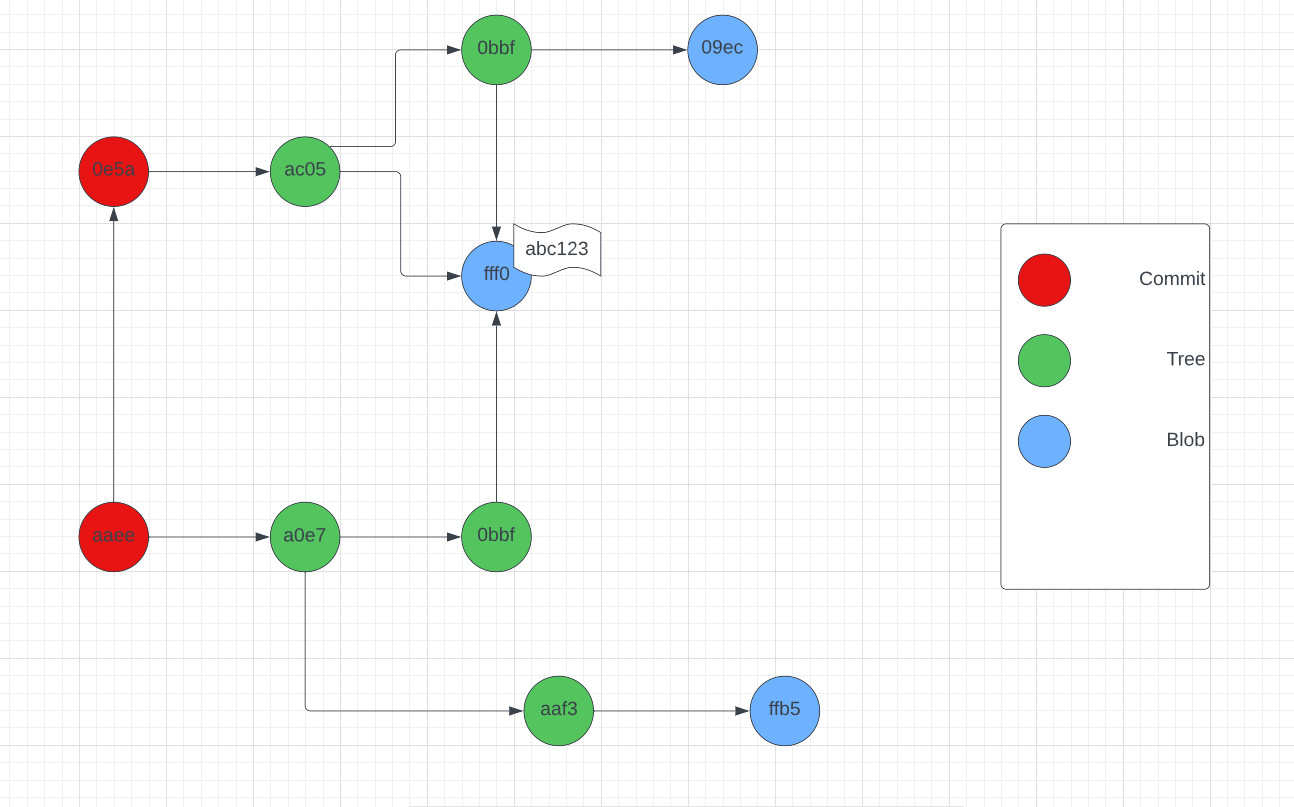



Branches: 
- A branch is just a reference/pointer to a particular commit.
- To create a new branch, we can use the command 



To create a new branch, we can use the command "git branch <branchname>"

- in the example below, we have created a new branch feature/newbutton. The branch was created from the main branch, thus, both branches will both point to the same commit.

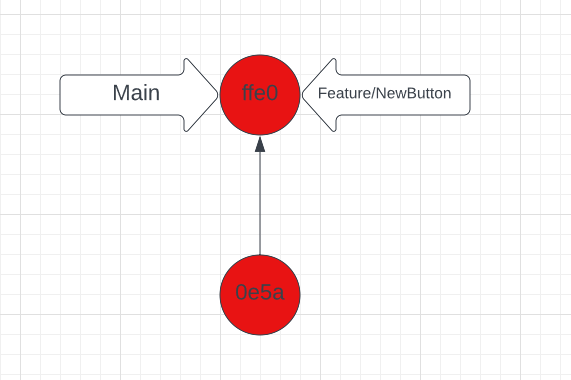

How does Git know which branch is the current branch?
- The HEAD folder contains the reference to the current branch (a pointer to the refs folder that contains the file representing the current branch).
- A HEAD is like a pointer to a pointer. Each time a new commit is created the head moves along with the branch pointer.

What happens we switch branches? (Using git switch / checkout) 
- The head pointer switches to the new branch
- Git updates the files and folders in the working directory to be the state that is represented by that commit. Remember, a branch is just a pointer to a commit, when we switch branches, we are just switching to to a pointer that points to a particular commit.

Merging: 
- In terms of the four fundamental git objects, what is a merge? Well, a merge is just a commit, that has at least two parent commits. I.e., a merge is the result of combining the changes and history from at least two commits. After a merge is complete the branch and the head pointers are moved to point to this new commit.
- Below illustrates an example of a merge, here, we merge the changes of feature/newbutton into main. This creates a new commit, that has two parents, the original main commit and the feature branch commit that was merged into main.

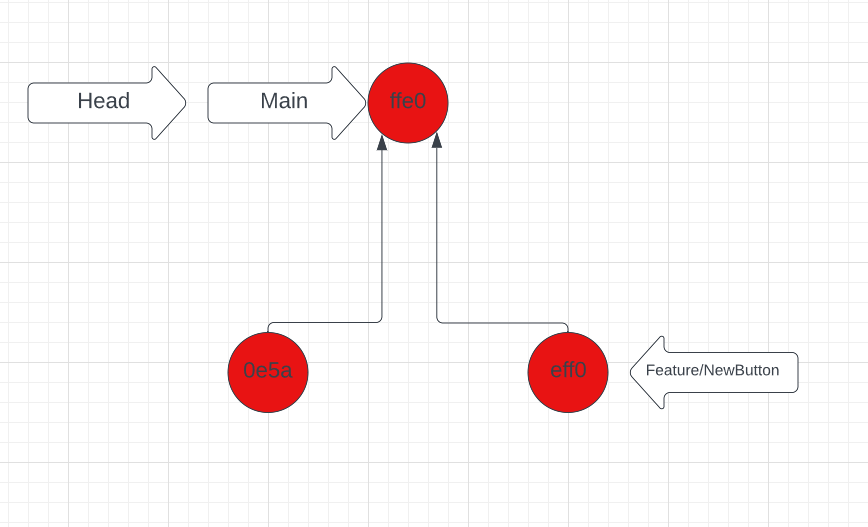

Special case of merges ( Fast forward merging ):
- When merging from a child commit to its parent commit (i.e we want the changes from a child commit to also reflect in its parent ) : Git can sometimes do a fast forward merge, which is switching the pointer of the parent branch and the head pointer to both point to the child branch. This is an optimisation done by Git to prevent it from having to create new commit objects.
- In the example below, we want to merge all the changes of main into feature/newbutton. as feature/newbutton is one of the parents of main. Git will do a fast forward merge in order to prevent having to create a new merge commit. This would result in the feature/newbutton and the head pointer to point to the same commit as main, resulting in the changes of main also being in feature/newbutton.

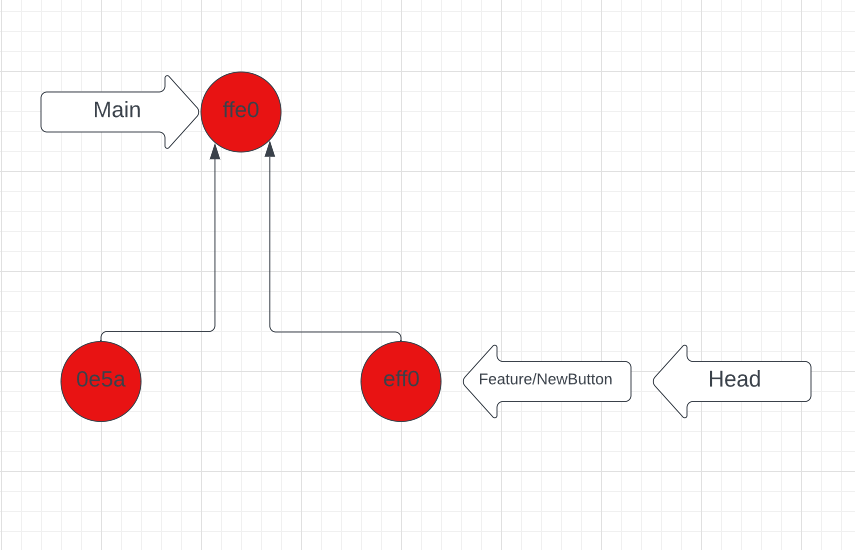

Becomes 

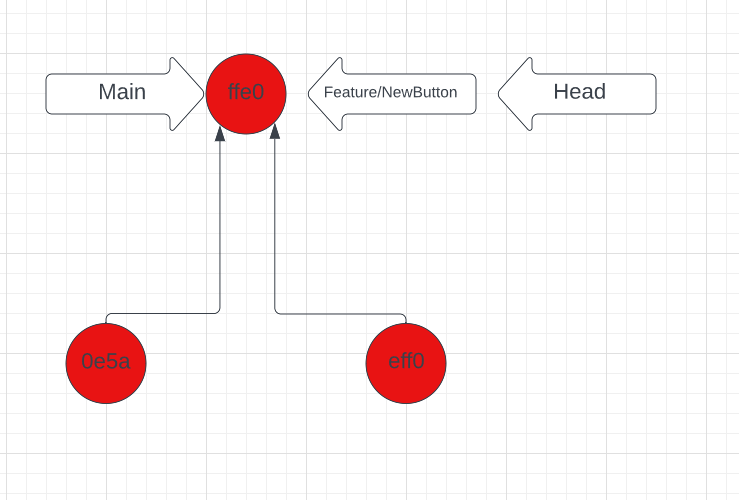

Detaching the head
- We are able to checkout to a particular commit instead of a branch using its hash. This will cause the head to point to the hash of the commit. The benefit of doing this is we can make some changes, without attaching it to a particular branch, we can create many branchless commits and if we are not happy with the changes we can simply switch back to a branch. These disconnected commits will then be automatically garbage collected.

Rebasing: 

- When we do a rebase, git finds the first common parent commit between two branches. It creates a copy of all commits of a branch that we are doing the rebase in, from but not including the first common commit up to the latest commit, it then attaches those commits on top of the branch we are rebasing to. 
- Note, after rebasing the history is not correctly preserved, as we are placing a bunch of commits on top of a new base commit, their commit histories could be entirely different.
